In [150]:
#import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import MiniBatchKMeans
from preprocess import *
from collections import Counter
import cv2
from skimage.transform import pyramid_reduce
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
image=cv2.imread("../fonts-dataset/Marhey/24.jpeg")
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [152]:
image=denoise(image)
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [153]:
levels = []
while image.shape[0] > 128:
  levels.append(image)
  image = pyramid_reduce(image)
levels.append(image)

In [154]:
for i in range(len(levels)):
  cv2.imshow("level "+str(i), levels[i])
  cv2.waitKey(0)
  cv2.destroyAllWindows()

## Gaussian Kernel

In [155]:
m = 4 # 1 sided filter size
x_index, y_index = np.meshgrid(np.arange(-m, m + 1), np.arange(-m, m + 1))
x_index = x_index.reshape((-1, 1))
y_index = y_index.reshape((-1, 1))

G = lambda x, y: np.exp(-(x**2 + y**2))
G0 = lambda x, y: -2*x*G(x,y)

# OPTIONAL: remove negative (to align mathematically) since vertical numers increase as we go down 
G90 = lambda x, y: 2*y*G(x,y) 

# Gaussian Kernel
gk = G(x_index, y_index).reshape((m*2 + 1, m*2 + 1))

# Gaussian 1st Deriviative with 0 degree orientation
gk0 = G0(x_index, y_index).reshape((m*2 + 1, m*2 + 1))

# Gaussian 1st Deriviative with 90 degree orientation
gk90 = G90(x_index, y_index).reshape((m*2 + 1, m*2 + 1))

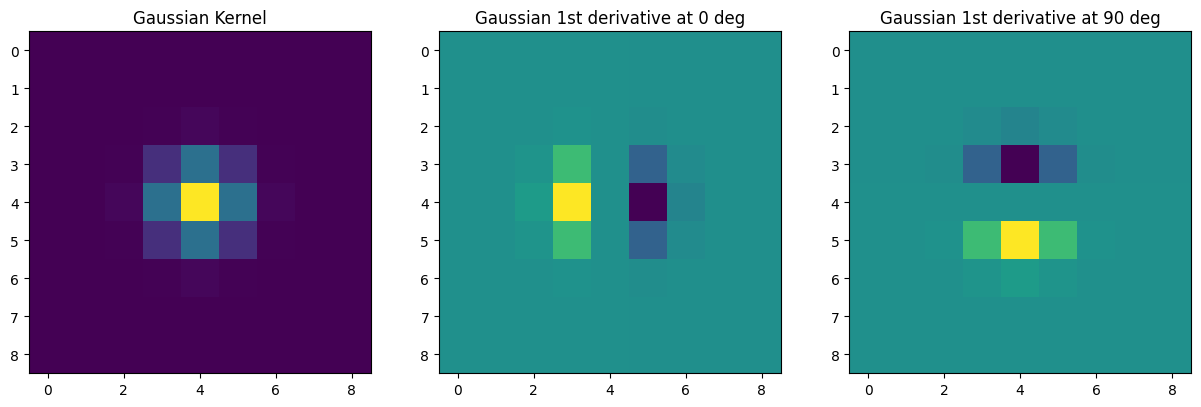

In [156]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gk)
ax[0].set_title("Gaussian Kernel")
ax[1].imshow(gk0)
ax[1].set_title("Gaussian 1st derivative at 0 deg")
ax[2].imshow(gk90)
ax[2].set_title("Gaussian 1st derivative at 90 deg");

In [157]:
#! filter2D function performs normalization automatically by default.
R = cv2.filter2D(levels[0], ddepth=-1, kernel=gk)
R0 = cv2.filter2D(levels[0], ddepth=-1, kernel=gk0)
R90 = cv2.filter2D(levels[0], ddepth=-1, kernel=gk90)

In [158]:
cv2.imshow("image",R90)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Steering Filter

In [159]:
steering_angles = np.arange(0, 180, 30)
print(steering_angles)

[  0  30  60  90 120 150]


In [160]:
results = np.zeros((levels[0].shape[0], levels[0].shape[1], len(steering_angles)))
results.shape

(1181, 1181, 6)

In [161]:
gk_theta=[]
for angle in steering_angles:
  gk_theta.append(np.cos(np.radians(angle))*gk0 + np.sin(np.radians(angle))*gk90)

In [162]:
R_Theta=[]
for g_theta in gk_theta:
  R_Theta.append(cv2.filter2D(levels[0], ddepth=-1, kernel=g_theta))

In [163]:
cv2.imshow("image",R_Theta[3])
cv2.imshow("image2",R90)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [164]:
for img in R_Theta:  
  cv2.imshow("image",img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()